In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime as dt 
import numpy as np
import matplotlib.pyplot as plt
import re
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


In [2]:
seasons={}

In [3]:
for year in range(1979,2022):
    
    url = 'https://www.basketball-reference.com/leagues/NBA_{}_totals.html'.format(year)
    r = requests.get(url)
    r_html = r.text
    soup = BeautifulSoup(r_html,'html.parser')
    table=soup.find_all(class_="full_table")
    table=soup.find_all(class_="full_table")

    """ Extracting List of column names"""
    head=soup.find(class_="thead")
    column_names_raw=[head.text for item in head][0]
    column_names_polished=column_names_raw.replace("\n",",").split(",")[2:-1]
    print(column_names_polished)
    ['Player',
     'Pos',
     'Age',
     'Tm',
     'G',
     'GS',
     'MP',
     'FG',
     'FGA',
     'FG%',
     '3P',
     '3PA',
     '3P%',
     '2P',
     '2PA',
     '2P%',
     'eFG%',
     'FT',
     'FTA',
     'FT%',
     'ORB',
     'DRB',
     'TRB',
     'AST',
     'STL',
     'BLK',
     'TOV',
     'PF',
     'PTS']
    """Extracting full list of player_data"""
    players=[]

    for i in range(len(table)):

            player_=[]

            for td in table[i].find_all("td"):
                player_.append(td.text)

            players.append(player_)
    df=pd.DataFrame(players, columns=column_names_polished).set_index("Player")
    #cleaning the player's name from occasional special characters
    df.index=df.index.str.replace('*', '')
    seasons[year]=df


['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


<ipython-input-3-f06e5760fed5>:57: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.index=df.index.str.replace('*', '')


['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
['Player',

In [7]:
url = 'https://www.basketball-reference.com/leaders/ws_career_p.html#tot::2'
playoffs=pd.read_html(url)
playoffs=playoffs[0]
for index, row in playoffs.iterrows():
     playoffs.at[index, 'Player']= re.match(r'[A-Za-z+\s]+', row['Player'] )[0]
playoffs=playoffs.set_index("Player")
playoffs=playoffs.drop('Rank', axis =1)
playoffs



,WS
Player,
LeBron James,55.68
Michael Jordan,39.76
Tim Duncan,37.84
Kareem Abdul,35.56
Magic Johnson,32.63
...,...
Mario Chalmers,5.24
Antonio Daniels,5.19
Andrew Bynum,5.18


In [8]:
for year in seasons:
    seasons[year] =seasons[year].replace(np.NaN,0 )
    seasons[year] =seasons[year].replace('',0 )
    seasons[year]=seasons[year].drop('Pos', axis =1)
    seasons[year]=seasons[year].drop('Age', axis =1)
    seasons[year]=seasons[year].drop('FG%', axis =1)
    seasons[year]=seasons[year].drop('FT%', axis =1)
    seasons[year]=seasons[year].drop('eFG%', axis =1)
    seasons[year]=seasons[year].drop('2P%', axis =1)
    seasons[year]=seasons[year].drop('3P%', axis =1)
    seasons[year]=seasons[year].drop('Tm', axis =1)

KeyError: "['Pos'] not found in axis"

NameError: name 'career_totals' is not defined

In [39]:
career_totals=seasons[1979]

print(career_totals)
for year in range(1980,2022):
    seasons[year] =seasons[year].replace(np.NaN,0 )
    seasons[year] =seasons[year].replace('',0 )
    career_totals =career_totals.replace(np.NaN,0 )
    career_totals =career_totals.replace('',0 )
    for col in career_totals.columns:
        career_totals[col] = career_totals[col].astype(int)
    for i, row in seasons[year].iterrows():
        if i != 'Chris Babb':
            if i in career_totals.index.values:

                career_totals.at[i, 'PTS']+=int(row['PTS'])
                career_totals.at[i,'G']=career_totals.loc[i]['G']+int(row['G'])
                career_totals.at[i,'GS']=career_totals.loc[i]['GS']+int(row['GS'])
                career_totals.at[i,'MP']=career_totals.loc[i]['MP']+int(row['MP'])
                career_totals.at[i,'FG']=career_totals.loc[i]['FG']+int(row['FG'])
                career_totals.at[i,'FGA']=career_totals.loc[i]['FGA']+int(row['FGA'])
                career_totals.at[i,'3P']=career_totals.loc[i]['3P']+int(row['3P'])
                career_totals.at[i,'3PA']=career_totals.loc[i]['3PA']+int(row['3PA'])
                career_totals.at[i,'2P']=int(row['2P'])+ career_totals.loc[i]['2P']
                career_totals.at[i,'2PA']=int(row['2PA'])+career_totals.loc[i]['2PA']
                career_totals.at[i,'FT']=career_totals.loc[i]['FT']+int(row['FT'])
                career_totals.at[i,'FTA']=career_totals.loc[i]['FTA']+int(row['FTA'])
                career_totals.at[i,'ORB']=career_totals.loc[i]['ORB']+int(row['ORB'])
                career_totals.at[i,'DRB']=career_totals.loc[i]['DRB']+int(row['DRB'])
                career_totals.at[i,'TRB']=career_totals.loc[i]['TRB']+int(row['TRB'])
                career_totals.at[i,'AST']=career_totals.loc[i]['AST']+int(row['AST'])
                career_totals.at[i,'TOV']=career_totals.loc[i]['TOV']+int(row['TOV'])
                career_totals.at[i,'STL']=career_totals.loc[i]['STL']+int(row['STL'])
                career_totals.at[i,'BLK']=career_totals.loc[i]['BLK']+int(row['BLK'])
                career_totals.at[i,'STL']=career_totals.loc[i]['PF']+int(row['PF'])

            else:

                 career_totals=career_totals.append(row)
        
    print(year)
    print(career_totals.shape)
career_totals['2P%']=career_totals['2P']/(career_totals['2PA'])
career_totals['3P%']=career_totals['3P']/((career_totals['3PA']))
career_totals['FT%']=career_totals['FT']/((career_totals['FTA']))
career_totals['FG%']=career_totals['FG']/((career_totals['FGA']))

career_totals['eFG%']=(career_totals['2P']+.5*career_totals['3P'])/(combined['FGA'])
career_totals=combined.merge(playoffs,how='left', on='Player')
combined

                      G GS    MP   FG   FGA  3P  3PA   2P   2PA   FT  FTA  \
Player                                                                      
Kareem Abdul-Jabbar  80  0  3157  777  1347   0    0  777  1347  349  474   
Tom Abernethy        70  0  1219  176   342   0    0  176   342   70   94   
Alvan Adams          77  0  2364  569  1073   0    0  569  1073  231  289   
Lucius Allen         31  0   413   69   174   0    0   69   174   19   33   
Kim Anderson         21  0   224   24    77   0    0   24    77   15   28   
...                  .. ..   ...  ...   ...  ..  ...  ...   ...  ...  ...   
Ray Williams         81  0  2370  575  1257   0    0  575  1257  251  313   
John Williamson      74  0  2451  635  1367   0    0  635  1367  373  437   
Rick Wilson          61  0   589   81   197   0    0   81   197   24   44   
Brian Winters        79  0  2575  662  1343   0    0  662  1343  237  277   
Larry Wright         73  0  1658  276   589   0    0  276   589  125  168   

TypeError: can only concatenate str (not "int") to str

In [41]:
career_totals=seasons[1979]

print(seasons[2014].loc['Chris Babb']['PTS'])
for i, row in seasons[2014].iterrows():
    
        print(i)
        for col in career_totals.columns:
            career_totals[col] = career_totals[col].astype(int)
        if i in career_totals.index.values:
                    career_totals.at[i, 'PTS']+=int(row['PTS'])
        else:

                     career_totals=career_totals.append(row)


22
Quincy Acy
Steven Adams
Jeff Adrien
Arron Afflalo
Alexis Ajinça
Cole Aldrich
LaMarcus Aldridge
Lavoy Allen
Ray Allen
Tony Allen
Al-Farouq Aminu
Lou Amundson
Chris Andersen
Alan Anderson
James Anderson
Ryan Anderson
Giannis Antetokounmpo
Carmelo Anthony
Joel Anthony
Pero Antić
Trevor Ariza
Hilton Armstrong
Darrell Arthur
Ömer Aşık
D.J. Augustin
Gustavo Ayón
Jeff Ayres
Chris Babb
Luke Babbitt
Leandro Barbosa
J.J. Barea
Andrea Bargnani
Harrison Barnes
Matt Barnes
Will Barton
Brandon Bass
Shane Battier
Nicolas Batum
Jerryd Bayless
Aron Baynes
Kent Bazemore
Bradley Beal
Michael Beasley
Marco Belinelli
Anthony Bennett
Patrick Beverley
Andris Biedriņš
Chauncey Billups
Bismack Biyombo
DeJuan Blair
Steve Blake
Andray Blatche
Eric Bledsoe
Vander Blue
Keith Bogans
Andrew Bogut
Matt Bonner
Trevor Booker
Carlos Boozer
Chris Bosh
Avery Bradley
Elton Brand
Corey Brewer
Ronnie Brewer
Aaron Brooks
MarShon Brooks
Lorenzo Brown
Shannon Brown
Kobe Bryant
Chase Budinger
Reggie Bullock
Trey Burke
Alec Bu

In [42]:
combined=seasons[1979].merge(seasons[1980],how='outer', on='Player')
combined.insert(3,'career_PTS', 0)
combined.insert(3,'career_FG', 0)
combined.insert(3,'career_G', 0)
combined.insert(3,'career_GS', 0)
combined.insert(3,'career_MP', 0)
combined.insert(3,'career_FGA', 0)

combined.insert(3,'career_2P', 0)
combined.insert(3,'career_2PA', 0)
combined.insert(3,'career_3P', 0)
combined.insert(3,'career_3PA', 0)
combined.insert(3,'career_FT', 0)
combined.insert(3,'career_FTA', 0)
combined.insert(3,'career_ORB', 0)
combined.insert(3,'career_DRB', 0)

combined.insert(3,'career_TRB', 0)
combined.insert(3,'career_AST', 0)
combined.insert(3,'career_STL', 0)
combined.insert(3,'career_BLK', 0)
combined.insert(3,'career_TOV', 0)
combined.insert(3,'career_PF', 0)
#do percent here
combined.insert(3,'career_FG%', 0)
combined.insert(3,'career_2P%', 0)
combined.insert(3,'career_3P%', 0)
combined.insert(3,'career_FT%', 0)
combined.insert(3,'career_eFG%', 0)
combined =combined.replace(np.NaN,0 )
combined =combined.replace('',0 )

for index, row in combined.iterrows():
    #print(int(row['PTS_x'])+int(row['PTS_y']))
    combined.at[index, 'career_FG']=int(row['FG_x'])+int(row['FG_y'])
    combined.at[index, 'career_PTS']= int(row['PTS_x'])+int(row['PTS_y'])
    combined.at[index, 'career_G']=int(row['G_x'])+int(row['G_y'])
    combined.at[index, 'career_GS']= int(row['GS_x'])+int(row['GS_y'])
    combined.at[index, 'career_MP']= int(row['MP_x'])+int(row['MP_y'])
    combined.at[index, 'career_FGA']= int(row['FGA_x'])+int(row['FGA_y'])
    
    combined.at[index, 'career_2P']=int(row['2P_x'])+int(row['2P_y'])
    combined.at[index, 'career_2PA']= int(row['2PA_x'])+int(row['2PA_y'])
    combined.at[index, 'career_3P']=int(row['3P_x'])+int(row['3P_y'])
    combined.at[index, 'career_3PA']= int(row['3PA_x'])+int(row['3PA_y'])
    combined.at[index, 'career_FT']=int(row['FT_x'])+int(row['FT_y'])
    combined.at[index, 'career_FTA']= int(row['FTA_x'])+int(row['FTA_y'])
    combined.at[index, 'career_ORB']= int(row['ORB_x'])+int(row['ORB_y'])
    combined.at[index, 'career_DRB']= int(row['DRB_x'])+int(row['DRB_y'])
    combined.at[index, 'career_TRB']= int(row['TRB_x'])+int(row['TRB_y'])
    
    combined.at[index, 'career_TRB']= int(row['2PA_x'])+int(row['2PA_y'])
    combined.at[index, 'career_FT']=int(row['FT_x'])+int(row['FT_y'])
    combined.at[index, 'career_FTA']= int(row['FTA_x'])+int(row['FTA_y'])
    combined.at[index, 'career_ORB']= int(row['ORB_x'])+int(row['ORB_y'])
    combined.at[index, 'career_DRB']= int(row['DRB_x'])+int(row['DRB_y'])
    
    combined.at[index, 'career_TRB']=int(row['TRB_x'])+int(row['TRB_y'])
    combined.at[index, 'career_AST']= int(row['AST_x'])+int(row['AST_y'])
    combined.at[index, 'career_STL']= int(row['STL_x'])+int(row['STL_y'])
    combined.at[index, 'career_BLK']= int(row['BLK_x'])+int(row['BLK_y'])
    
    combined.at[index, 'career_TOV']= int(row['TOV_x'])+int(row['TOV_y'])
    combined.at[index, 'career_PF']= int(row['PF_x'])+int(row['PF_y'])
    
   

combined=combined.drop('PTS_y', axis =1)
combined=combined.drop('FG_y', axis =1)
combined=combined.drop('PTS_x', axis =1)
combined=combined.drop('FG_x', axis =1)
combined=combined.drop('G_x', axis =1)
combined=combined.drop('G_y', axis =1)
combined=combined.drop('GS_x', axis =1)
combined=combined.drop('GS_y', axis =1)
combined=combined.drop('MP_x', axis =1)
combined=combined.drop('MP_y', axis =1)
combined=combined.drop('FGA_x', axis =1)
combined=combined.drop('FGA_y', axis =1)
combined=combined.drop('2P_x', axis =1)
combined=combined.drop('2P_y', axis =1)
combined=combined.drop('2PA_x', axis =1)
combined=combined.drop('2PA_y', axis =1)
combined=combined.drop('3P_x', axis =1)
combined=combined.drop('3P_y', axis =1)
combined=combined.drop('3PA_x', axis =1)
combined=combined.drop('3PA_y', axis =1)
combined=combined.drop('FT_x', axis =1)
combined=combined.drop('FT_y', axis =1)
combined=combined.drop('FTA_x', axis =1)
combined=combined.drop('FTA_y', axis =1)
combined=combined.drop('ORB_x', axis =1)
combined=combined.drop('ORB_y', axis =1)
combined=combined.drop('DRB_x', axis =1)
combined=combined.drop('DRB_y', axis =1)
combined=combined.drop('TRB_x', axis =1)
combined=combined.drop('TRB_y', axis =1)
combined=combined.drop('AST_x', axis =1)
combined=combined.drop('AST_y', axis =1)
combined=combined.drop('STL_x', axis =1)
combined=combined.drop('STL_y', axis =1)
combined=combined.drop('BLK_x', axis =1)
combined=combined.drop('BLK_y', axis =1)
combined=combined.drop('TOV_x', axis =1)
combined=combined.drop('TOV_y', axis =1)
combined=combined.drop('PF_x', axis =1)
combined=combined.drop('PF_y', axis =1)


#print(seasons[1997].loc['Michael Jordan'], combined.loc['Michael Jordan'])

In [43]:
for year in range(1981,2022):
  
    print(year)
    combined=combined.merge(seasons[year],how='outer', on='Player')
       
    combined =combined.replace(np.NaN,0 )
   
    for index, row in combined.iterrows():
        
        combined.at[index, 'career_FG']=int(row['career_FG'])+int(row['FG'])
        combined.at[index, 'career_PTS']= int(row['career_PTS'])+int(row['PTS'])
        combined.at[index, 'career_G']= int(row['career_G'])+int(row['G'])
        combined.at[index, 'career_GS']= int(row['career_GS'])+int(row['GS'])
        combined.at[index, 'career_MP']= int(row['career_MP'])+int(row['MP'])
        combined.at[index, 'career_FGA']= int(row['career_FGA'])+int(row['FGA'])
        
        combined.at[index, 'career_2P']=int(row['career_2P'])+int(row['2P'])
        combined.at[index, 'career_2PA']= int(row['career_2PA'])+int(row['2PA'])
        combined.at[index, 'career_3P']=int(row['career_3P'])+int(row['3P'])
        combined.at[index, 'career_3PA']= int(row['career_3PA'])+int(row['3PA'])
        combined.at[index, 'career_FT']= int(row['career_FT'])+int(row['FT'])
        combined.at[index, 'career_FTA']= int(row['career_FTA'])+int(row['FTA'])
        combined.at[index, 'career_ORB']= int(row['career_ORB'])+int(row['ORB'])
        combined.at[index, 'career_DRB']= int(row['career_DRB'])+int(row['DRB'])
        combined.at[index, 'career_BLK']= int(row['career_BLK'])+int(row['BLK'])
        
        combined.at[index, 'career_TRB']=int(row['career_TRB'])+int(row['TRB'])
        combined.at[index, 'career_STL']= int(row['career_STL'])+int(row['STL'])
        combined.at[index, 'career_AST']= int(row['career_AST'])+int(row['AST'])
        combined.at[index, 'career_TOV']= int(row['career_TOV'])+int(row['TOV'])
        combined.at[index, 'career_PF']= int(row['career_PF'])+int(row['PF'])

        #combined.at[index, 'career_2P%']= int(row['career_2P'])/(int(row['career_2PA']+1))
        #combined.at[index, 'career_3P%']= int(row['career_3P'])/(int(row['career_3PA']+1))
        
    #combined=combined.drop('PTS_y', axis =1)
    combined=combined.drop('PTS', axis =1)
    combined=combined.drop('FG', axis =1)
    combined=combined.drop('G', axis =1)
    combined=combined.drop('GS', axis =1)
    combined=combined.drop('MP', axis =1)
    combined=combined.drop('FGA', axis =1)
    
    combined=combined.drop('2P', axis =1)
    combined=combined.drop('2PA', axis =1)
    combined=combined.drop('3P', axis =1)
    combined=combined.drop('3PA', axis =1)
    combined=combined.drop('FT', axis =1)
    combined=combined.drop('FTA', axis =1)
    combined=combined.drop('ORB', axis =1)
    combined=combined.drop('DRB', axis =1)
    combined=combined.drop('TRB', axis =1)
    combined=combined.drop('AST', axis =1)
    combined=combined.drop('STL', axis =1)
    combined=combined.drop('BLK', axis =1)
    combined=combined.drop('TOV', axis =1)
    combined=combined.drop('PF', axis =1)
combined['career_2P%']=combined['career_2P']/(combined['career_2PA'])
combined['career_3P%']=combined['career_3P']/(combined['career_3PA'])
combined['career_FT%']=combined['career_FT']/(combined['career_FTA'])
combined['career_FG%']=combined['career_FG']/(combined['career_FGA'])

combined['career_eFG%']=(combined['career_2P']+.5*combined['career_3P'])/(combined['career_FGA'])

combined



1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


,career_eFG%,career_FT%,career_3P%,career_2P%,career_FG%,career_PF,career_TOV,career_BLK,career_STL,career_AST,...,career_3PA,career_3P,career_2PA,career_2P,career_FGA,career_MP,career_GS,career_G,career_FG,career_PTS
Player,,,,,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,0.572200,0.742593,0.055556,0.572952,0.572238,2488.0,2319.0,1910.0,660.0,2651.0,...,18.0,1.0,13036.0,7469.0,13054.0,28832.0,625.0,867.0,7470.0,18149.0
Tom Abernethy,0.492350,0.702020,0.000000,0.493724,0.492350,285.0,79.0,28.0,81.0,185.0,...,2.0,0.0,717.0,354.0,719.0,2739.0,0.0,176.0,354.0,847.0
Alvan Adams,0.507384,0.809458,0.133333,0.508199,0.507507,2438.0,1960.0,542.0,987.0,3015.0,...,15.0,2.0,8111.0,4122.0,8126.0,20355.0,342.0,766.0,4124.0,10013.0
Lucius Allen,0.396552,0.575758,NaN,0.396552,0.396552,52.0,30.0,6.0,21.0,44.0,...,0.0,0.0,174.0,69.0,174.0,413.0,0.0,31.0,69.0,157.0
Kim Anderson,0.311688,0.535714,NaN,0.311688,0.311688,42.0,22.0,5.0,4.0,15.0,...,0.0,0.0,77.0,24.0,77.0,224.0,0.0,21.0,24.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patrick Williams,0.431818,0.728000,0.391304,0.515385,0.482955,126.0,98.0,46.0,64.0,99.0,...,138.0,54.0,390.0,201.0,528.0,1983.0,71.0,71.0,255.0,655.0
Dylan Windler,0.338462,0.777778,0.337662,0.584906,0.438462,37.0,32.0,12.0,19.0,33.0,...,77.0,26.0,53.0,31.0,130.0,513.0,0.0,31.0,57.0,161.0
Cassius Winston,0.303030,0.833333,0.470588,0.375000,0.424242,8.0,5.0,1.0,2.0,12.0,...,17.0,8.0,16.0,6.0,33.0,98.0,0.0,22.0,14.0,41.0


In [44]:
#merge with win percentage
combined=combined.merge(playoffs,how='left', on='Player')
#combined=combined.drop('WS/48_x', axis =1)
#combined.rename(columns={"WS/48_x":"career_playoff_WS/48"})
combined

,career_eFG%,career_FT%,career_3P%,career_2P%,career_FG%,career_PF,career_TOV,career_BLK,career_STL,career_AST,...,career_3P,career_2PA,career_2P,career_FGA,career_MP,career_GS,career_G,career_FG,career_PTS,WS
Player,,,,,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,0.572200,0.742593,0.055556,0.572952,0.572238,2488.0,2319.0,1910.0,660.0,2651.0,...,1.0,13036.0,7469.0,13054.0,28832.0,625.0,867.0,7470.0,18149.0,NaN
Tom Abernethy,0.492350,0.702020,0.000000,0.493724,0.492350,285.0,79.0,28.0,81.0,185.0,...,0.0,717.0,354.0,719.0,2739.0,0.0,176.0,354.0,847.0,NaN
Alvan Adams,0.507384,0.809458,0.133333,0.508199,0.507507,2438.0,1960.0,542.0,987.0,3015.0,...,2.0,8111.0,4122.0,8126.0,20355.0,342.0,766.0,4124.0,10013.0,NaN
Lucius Allen,0.396552,0.575758,NaN,0.396552,0.396552,52.0,30.0,6.0,21.0,44.0,...,0.0,174.0,69.0,174.0,413.0,0.0,31.0,69.0,157.0,NaN
Kim Anderson,0.311688,0.535714,NaN,0.311688,0.311688,42.0,22.0,5.0,4.0,15.0,...,0.0,77.0,24.0,77.0,224.0,0.0,21.0,24.0,63.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patrick Williams,0.431818,0.728000,0.391304,0.515385,0.482955,126.0,98.0,46.0,64.0,99.0,...,54.0,390.0,201.0,528.0,1983.0,71.0,71.0,255.0,655.0,NaN
Dylan Windler,0.338462,0.777778,0.337662,0.584906,0.438462,37.0,32.0,12.0,19.0,33.0,...,26.0,53.0,31.0,130.0,513.0,0.0,31.0,57.0,161.0,NaN
Cassius Winston,0.303030,0.833333,0.470588,0.375000,0.424242,8.0,5.0,1.0,2.0,12.0,...,8.0,16.0,6.0,33.0,98.0,0.0,22.0,14.0,41.0,NaN


Player
LeBron James        41150.2
Karl Malone         39401.6
Michael Jordan      36432.1
John Stockton       35781.2
Kobe Bryant         35331.2
Dirk Nowitzki       33220.7
Shaquille O'Neal    32228.2
Kevin Garnett       32208.5
Tim Duncan          31253.5
Chris Paul          30966.5
Name: off_rating, dtype: float64
Player
Shaquille O'Neal     8999.879199
Michael Jordan       8129.272536
Dirk Nowitzki        7186.098107
Kevin Garnett        6945.778427
LaMarcus Aldridge    6945.087215
Alex English         6936.794389
LeBron James         6671.504377
Karl Malone          6638.687617
Horace Grant         6402.925750
Tim Duncan           6274.505476
Name: off_rating_2, dtype: float64


FileNotFoundError: [Errno 2] No such file or directory: 'Gary Payton.jpeg'

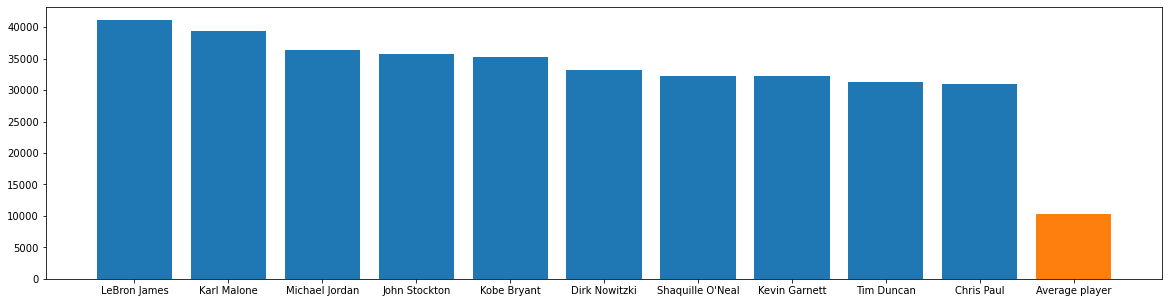

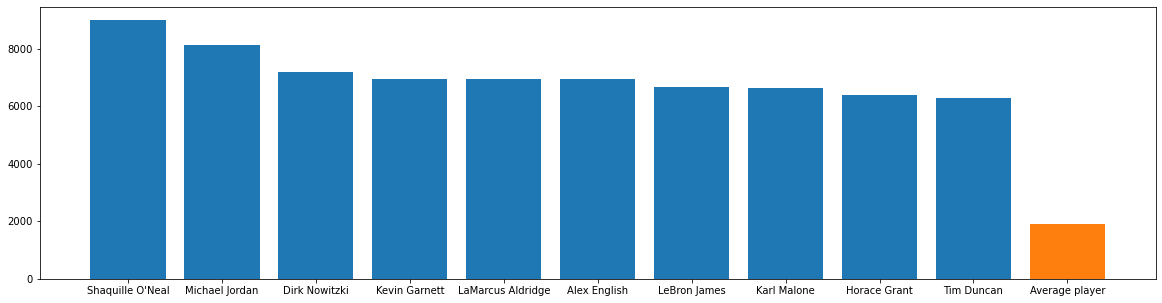

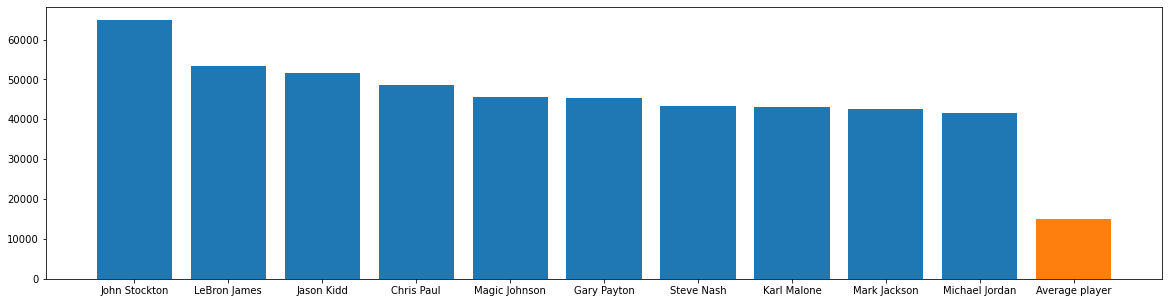

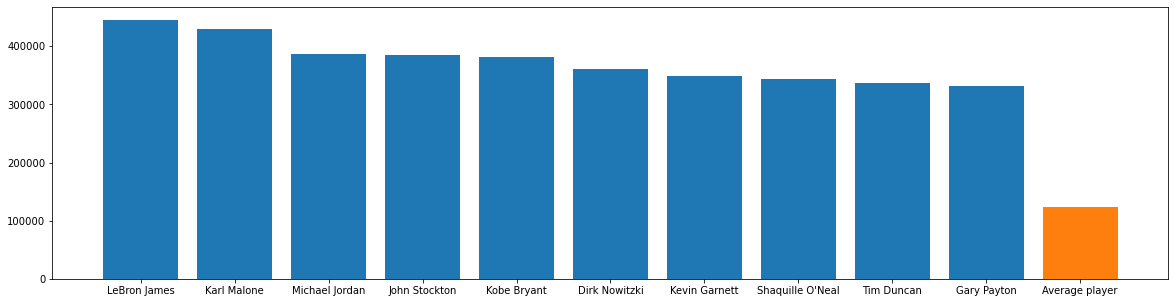

<Figure size 1440x360 with 0 Axes>

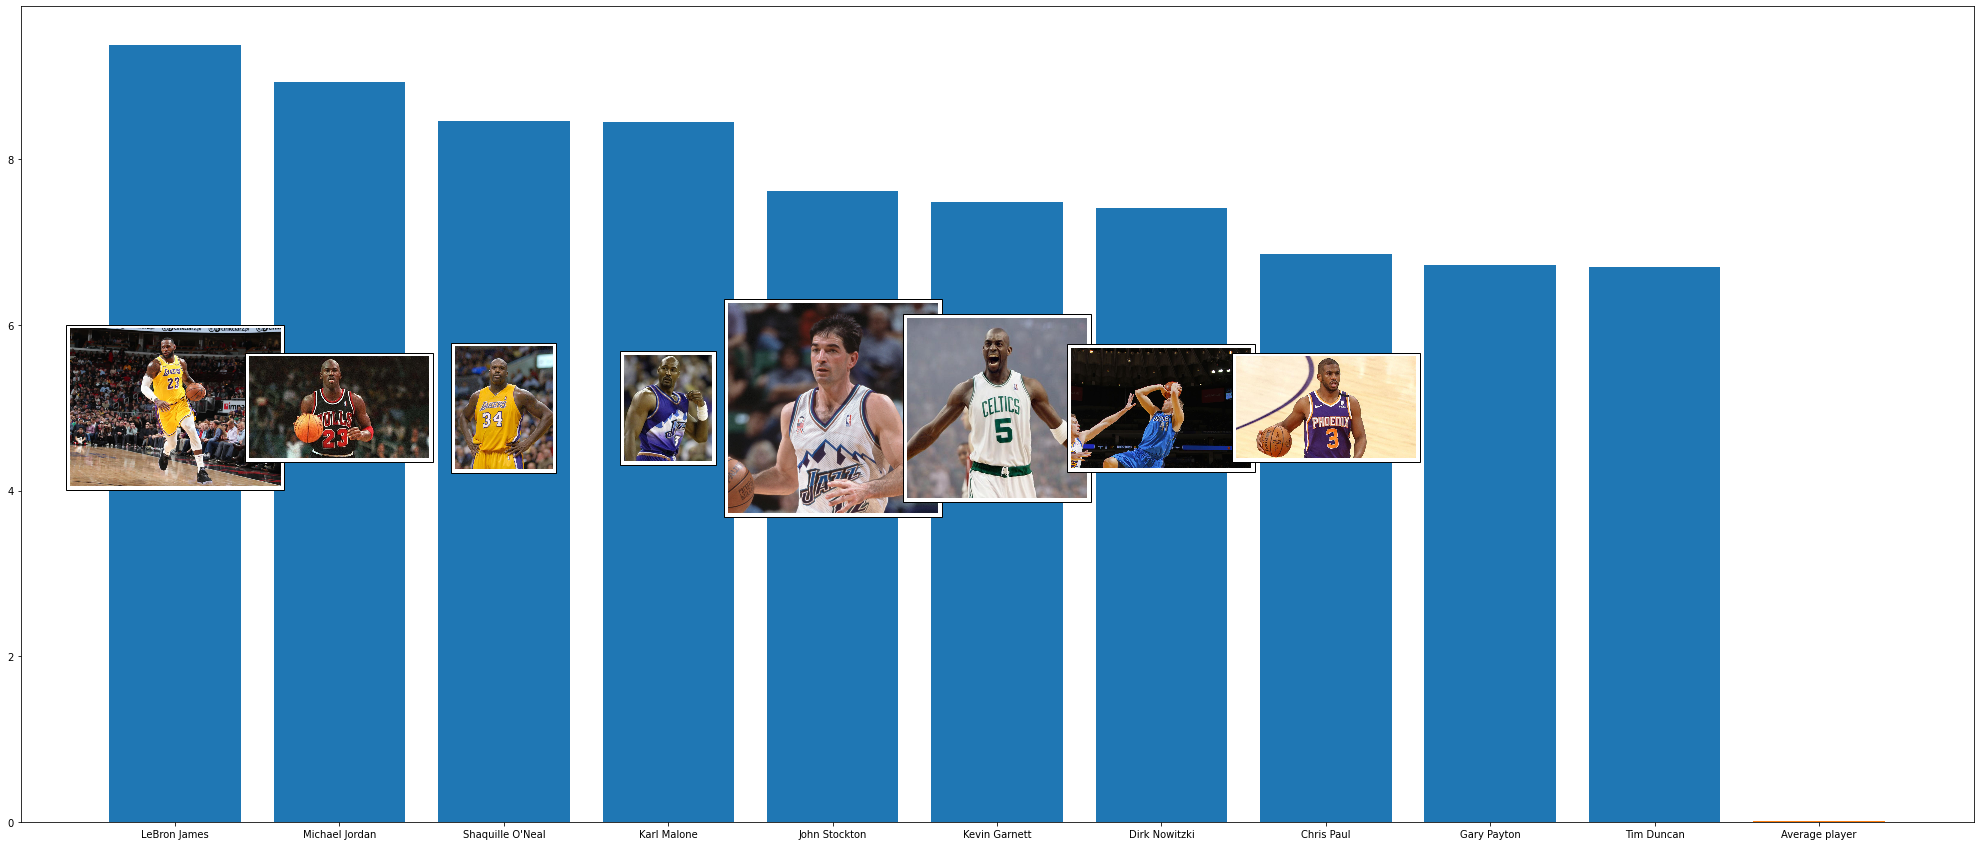

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

In [113]:
#Offensive weighting

#looking at overall totals
combined['off_rating']= (combined['career_PTS']+1.7*combined['career_AST']-3*combined['career_TOV']+2*combined['career_ORB'])

#incorporating shooting efficiency
combined['off_rating_2']= ((2*combined['career_2P']*combined['career_2P%'])+(3*combined['career_3P']*combined['career_3P%'])
                           +.5*combined['career_AST']-3*combined['career_TOV']+combined['career_ORB'])

#emphasizing team play and looking at games played
combined['off_rating_3']=(.8*combined['career_PTS']+4*combined['career_AST']
                          -4*combined['career_TOV']+3*combined['career_ORB'])


combined['off_rating_4']= (combined['career_PTS']+1.7*combined['career_AST']-3*combined['career_TOV']+2*combined['career_ORB'])*np.log(combined['career_MP'])

combined.sort_values(by=['off_rating'], inplace=True, ascending=False)
plt.figure(figsize=(20, 5))

plt.bar(combined[0:10].index, combined[0:10]['off_rating'])
plt.bar(['Average player'], [combined['career_PTS'].mean()])
print(combined[0:10]['off_rating'])
combined.sort_values(by=['off_rating_2'], inplace=True, ascending=False)
print(combined[0:10]['off_rating_2'])
plt.figure(figsize=(20, 5))

plt.bar(combined[0:10].index, combined[0:10]['off_rating_2'])
plt.bar(['Average player'], [combined['off_rating_2'].mean()])

plt.figure(figsize=(20, 5))
combined.sort_values(by=['off_rating_3'], inplace=True, ascending=False)

plt.bar(combined[0:10].index, combined[0:10]['off_rating_3'])
plt.bar(['Average player'], [combined['off_rating_3'].mean()])

plt.figure(figsize=(20, 5))
combined.sort_values(by=['off_rating_4'], inplace=True, ascending=False)

plt.bar(combined[0:10].index, combined[0:10]['off_rating_4'])
plt.bar(['Average player'], [combined['off_rating_4'].mean()])

#final is combination of ratings
combined['overall_off_rating']= (.9*(combined['off_rating']-combined['off_rating'].mean())/combined['off_rating'].std()+
                                 (combined['off_rating_2']-combined['off_rating_2'].mean())/combined['off_rating_2'].std()+
                                 .6*(combined['off_rating_3']-combined['off_rating_3'].mean())/combined['off_rating_3'].std()
                                )

plt.figure(figsize=(20, 5))
combined.sort_values(by=['overall_off_rating'], inplace=True, ascending=False)

fig, ax = plt.subplots(figsize=(35,15))
plt.bar(combined[0:10].index, combined[0:10]['overall_off_rating'])


plt.bar(['Average player'], [combined['overall_off_rating'].mean()])


for name in combined[0:10].index:
    image = plt.imread('{}.jpeg'.format(name))
    imBox=OffsetImage(image, zoom=.15)
    ab=AnnotationBbox(imBox,[name,5])
    ax.add_artist(ab)
    plt.figure(figsize=(1, 10))
    


John Stockton
LeBron James
Jason Kidd
Chris Paul
Magic Johnson
Gary Payton
Steve Nash
Karl Malone
Mark Jackson
Michael Jordan
Shaquille O'Neal
Michael Jordan
Dirk Nowitzki
Kevin Garnett
LaMarcus Aldridge
Alex English
LeBron James
Karl Malone
Horace Grant
Tim Duncan


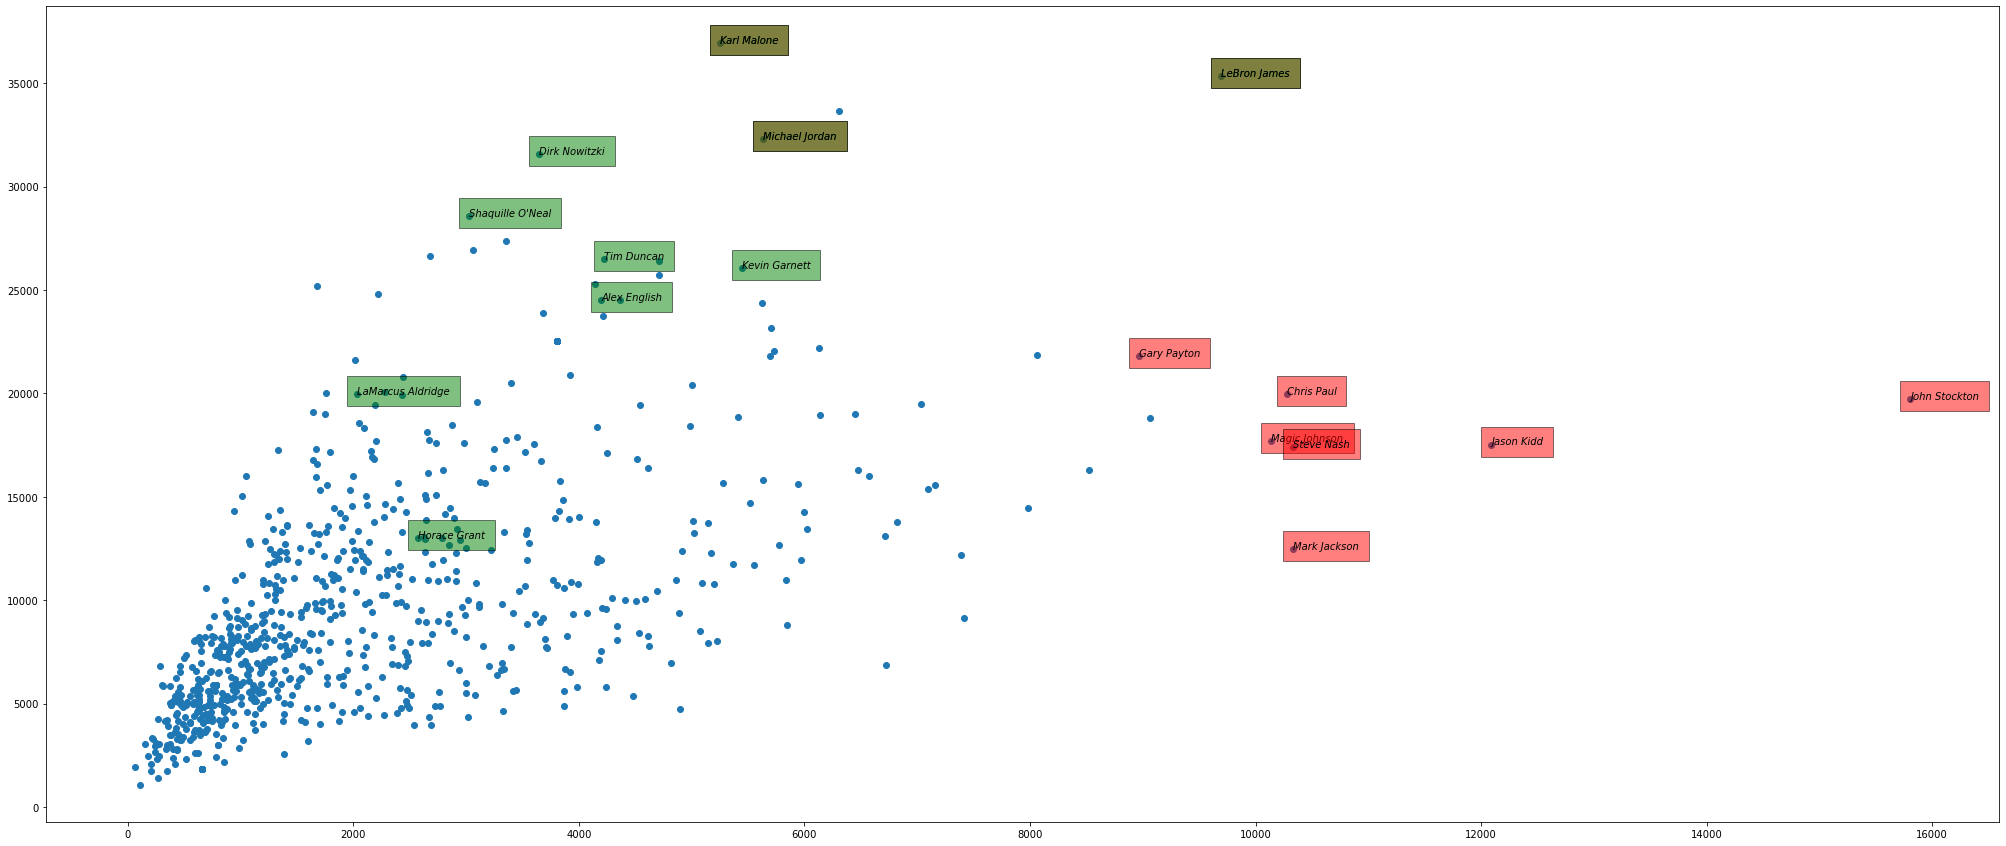

In [123]:
fig, ax = plt.subplots(figsize=(35,15))

plt.scatter(combined['career_AST'], combined['career_PTS'])
for name in combined[0:10].index:
    print(name)
    x= combined.loc[name]['career_AST']
    y= combined.loc[name]['career_PTS']
    ax.text(x, y, name , style='italic',
            bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
combined.sort_values(by=['off_rating_2'], inplace=True, ascending=False)
for name in combined[0:10].index:
    print(name)
    x= combined.loc[name]['career_AST']
    y= combined.loc[name]['career_PTS']
    ax.text(x, y, name , style='italic',
            bbox={'facecolor': 'green', 'alpha': 0.5, 'pad': 10})    

Shaquille O'Neal
Michael Jordan
Dirk Nowitzki
Kevin Garnett
LaMarcus Aldridge
Alex English
LeBron James
Karl Malone
Horace Grant
Tim Duncan
John Stockton
LeBron James
Jason Kidd
Chris Paul
Magic Johnson
Gary Payton
Steve Nash
Karl Malone
Mark Jackson
Michael Jordan


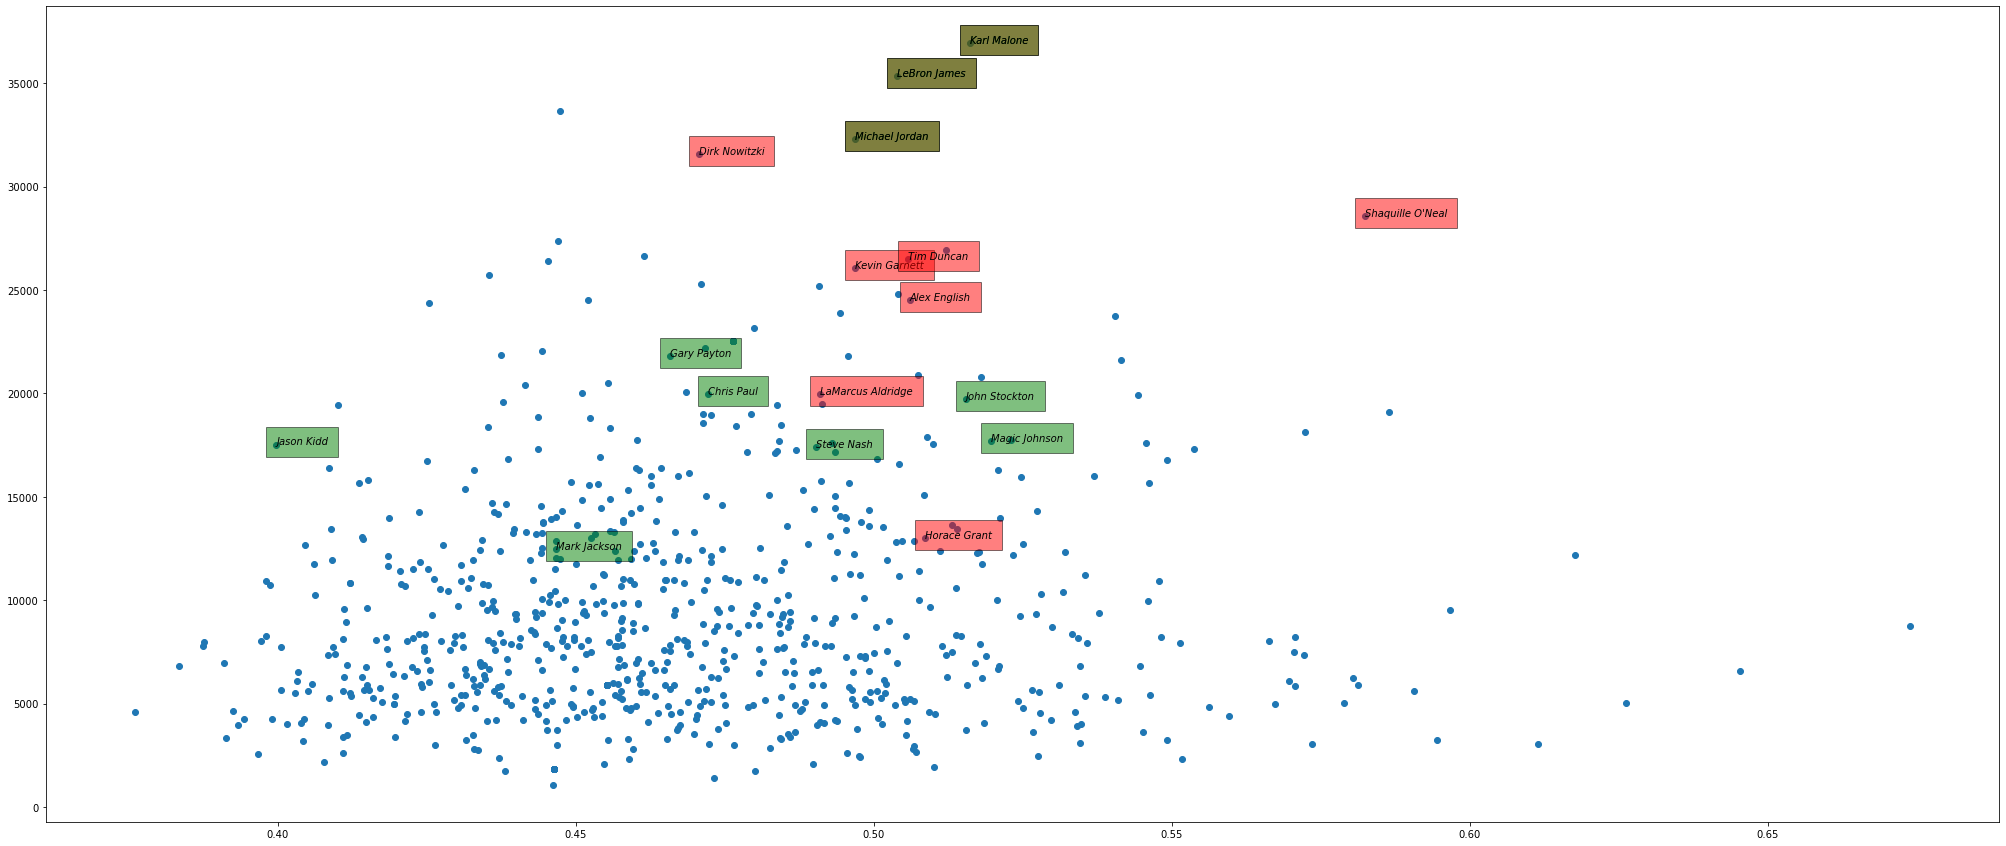

In [120]:
combined.sort_values(by=['off_rating_2'], inplace=True, ascending=False)

fig, ax = plt.subplots(figsize=(35,15))
plt.scatter(combined['career_FG%'], combined['career_PTS'])
for name in combined[0:10].index:
    print(name)
    x= combined.loc[name]['career_FG%']
    y= combined.loc[name]['career_PTS']
    ax.text(x, y, name , style='italic',
            bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
combined.sort_values(by=['off_rating_3'], inplace=True, ascending=False)
for name in combined[0:10].index:
    print(name)
    x= combined.loc[name]['career_FG%']
    y= combined.loc[name]['career_PTS']
    ax.text(x, y, name , style='italic',
            bbox={'facecolor': 'green', 'alpha': 0.5, 'pad': 10})

Stephen Curry
Ray Allen
Kyle Korver
Reggie Miller
James Harden
Jason Terry
Vince Carter
J.J. Redick
Paul Pierce
Jamal Crawford


<BarContainer object of 1 artists>

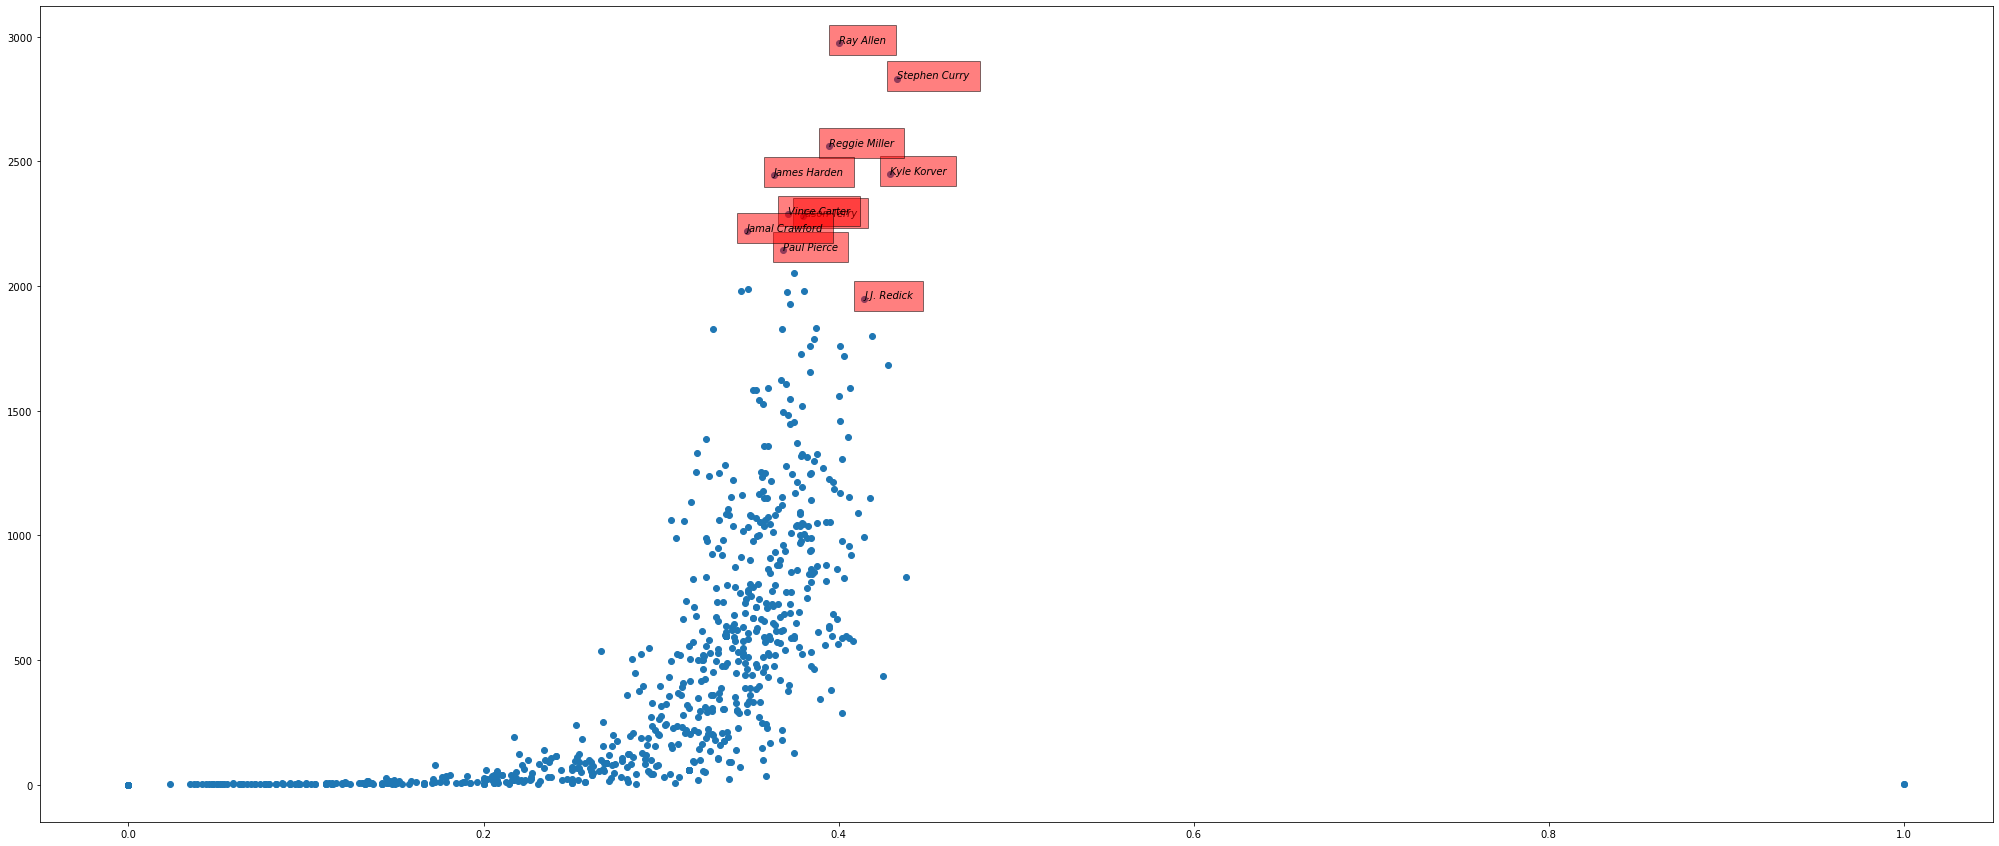

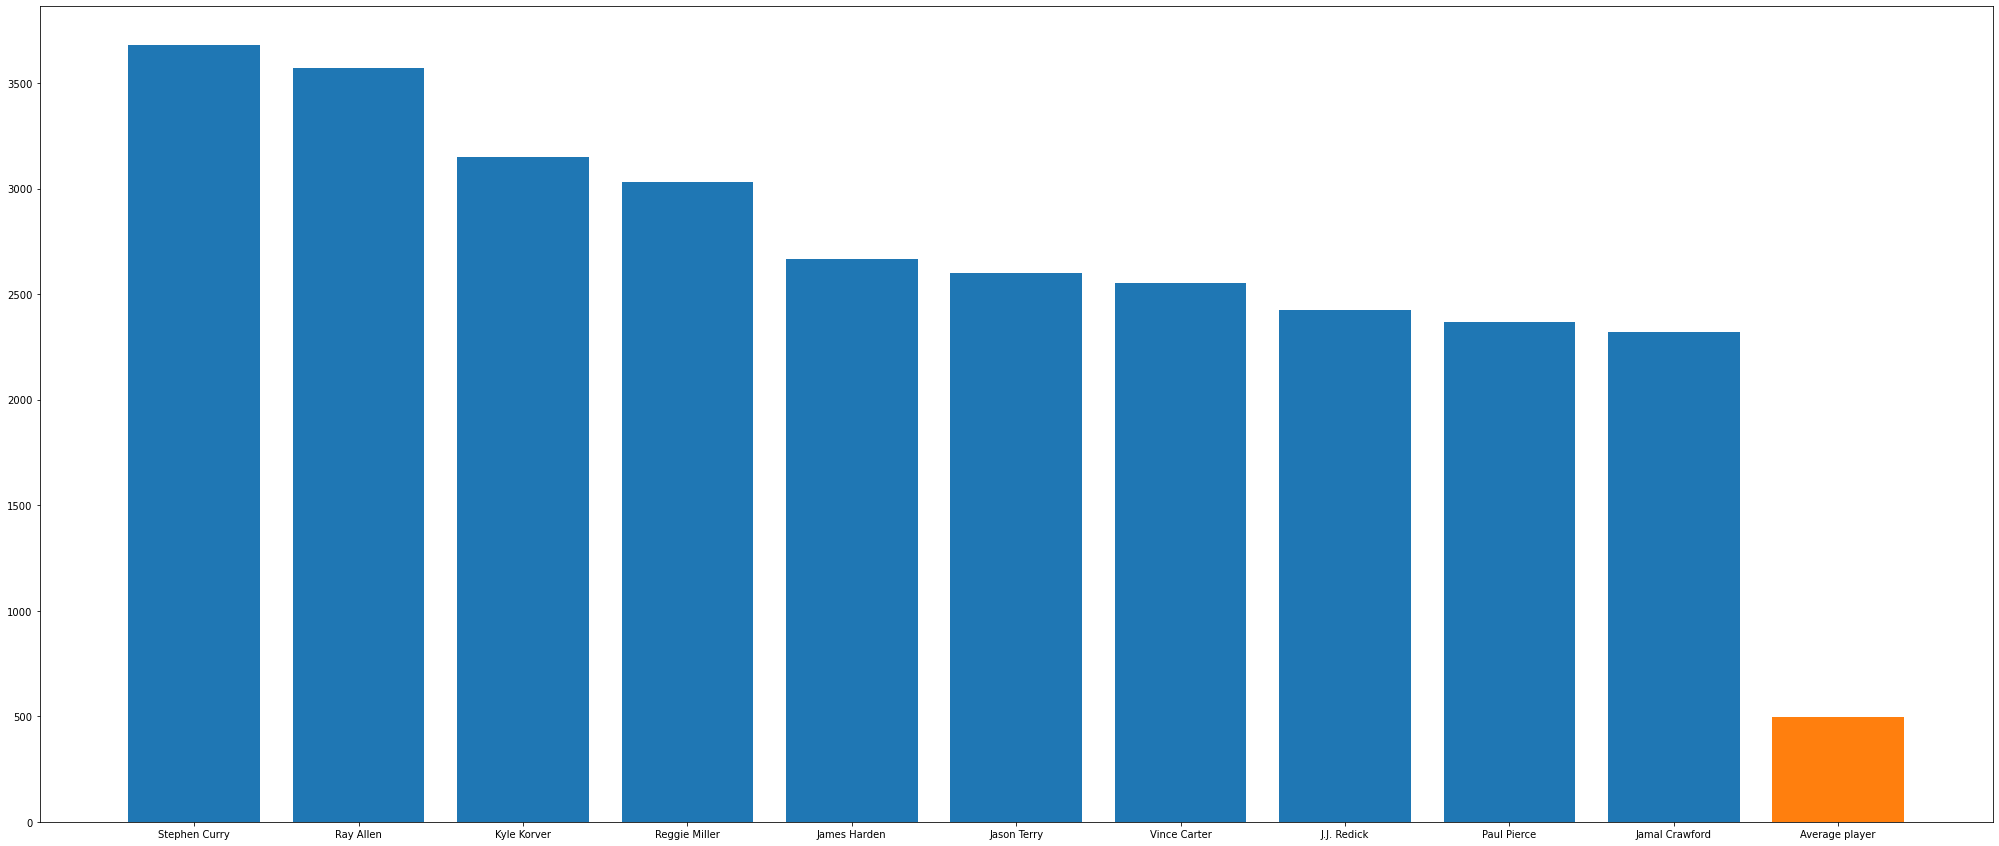

In [111]:
#additional shooting analytics best shooter of all time
combined= combined[combined['career_GS']>200]
combined['shoot_rating_1']= (3*combined['career_3P%']*combined['career_3P'])
combined.sort_values(by=['shoot_rating_1'], inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(35,15))
plt.scatter(combined['career_3P%'], combined['career_3P'])
for name in combined[0:10].index:
    print(name)
    x= combined.loc[name]['career_3P%']
    y= combined.loc[name]['career_3P']
    ax.text(x, y, name , style='italic',
            bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
fig, ax = plt.subplots(figsize=(35,15))
plt.bar(combined[0:10].index, combined[0:10]['shoot_rating_1'])
plt.bar(['Average player'], [combined['shoot_rating_1'].mean()])

#plt.scatter(combined['career_3P%'],combined['career_3P'])
#for name in combined[0:10].index:
 #   image = plt.imread('{}.jpeg'.format(name))
  #  imBox=OffsetImage(image, zoom=.15)
   # ab=AnnotationBbox(imBox,[name,5])
    #ax.add_artist(ab)
    #plt.figure(figsize=(1, 10))

Player
Hakeem Olajuwon     15706.0
Kevin Garnett       15349.0
Tim Duncan          15277.0
Karl Malone         14636.0
Dwight Howard       13477.0
Patrick Ewing       12887.0
Robert Parish       12535.0
Dirk Nowitzki       12512.0
Shaquille O'Neal    12361.0
Dikembe Mutombo     12334.0
Name: def_rating_1, dtype: float64


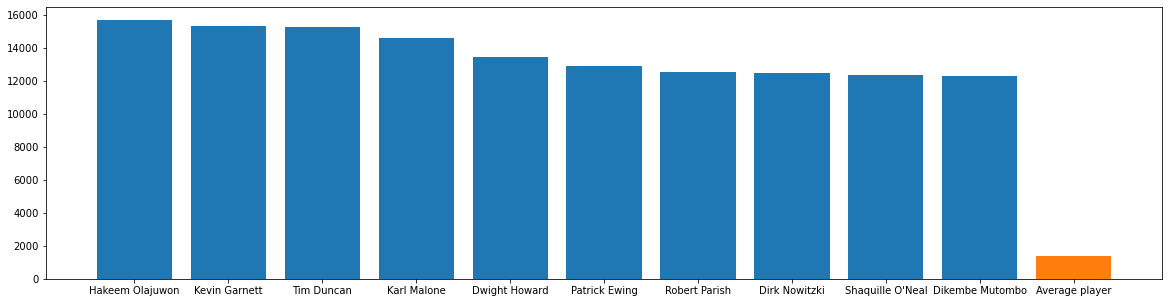

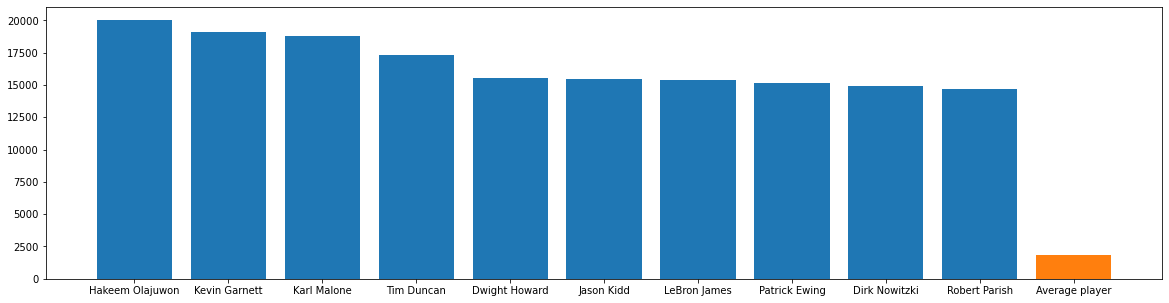

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

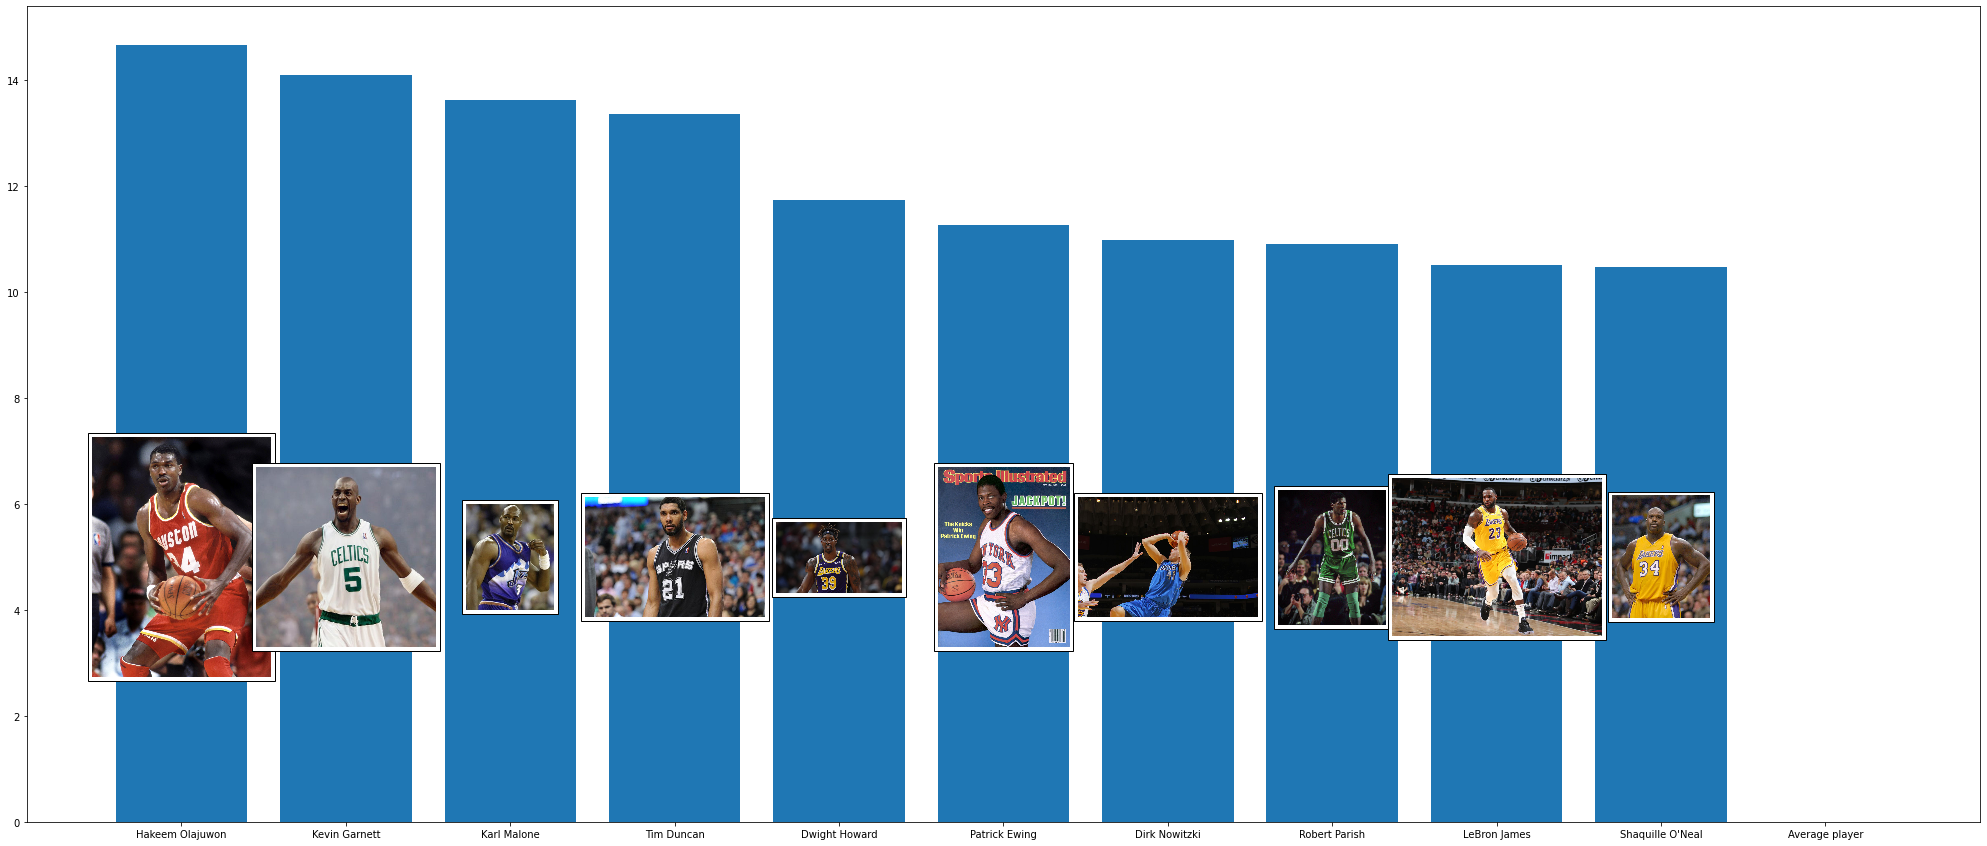

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

In [88]:
#Offensive weighting

#looking at overall totals
combined['def_rating_1']= (combined['career_BLK']+combined['career_STL']+combined['career_DRB'])

#incorporating shooting efficiency
combined['def_rating_2']= (combined['career_BLK']+3*combined['career_STL']+combined['career_DRB'])


combined.sort_values(by=['def_rating_1'], inplace=True, ascending=False)
plt.figure(figsize=(20, 5))

plt.bar(combined[0:10].index, combined[0:10]['def_rating_1'])
plt.bar(['Average player'], [combined['def_rating_1'].mean()])
print(combined[0:10]['def_rating_1'])
combined.sort_values(by=['def_rating_2'], inplace=True, ascending=False)

plt.figure(figsize=(20, 5))

plt.bar(combined[0:10].index, combined[0:10]['def_rating_2'])
plt.bar(['Average player'], [combined['def_rating_2'].mean()])

plt.figure(figsize=(20, 5))


#final is combination of ratings
combined['overall_def_rating']= ((combined['def_rating_1']-combined['def_rating_1'].mean())/combined['def_rating_1'].std()+
                                 (combined['def_rating_2']-combined['def_rating_2'].mean())/combined['def_rating_2'].std()
                               )

plt.figure(figsize=(20, 5))
combined.sort_values(by=['overall_def_rating'], inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(35,15))
plt.bar(combined[0:10].index, combined[0:10]['overall_def_rating'])

plt.bar(['Average player'], [combined['overall_def_rating'].mean()])
for name in combined[0:10].index:
    image = plt.imread('{}.jpeg'.format(name))
    imBox=OffsetImage(image, zoom=.15)
    ab=AnnotationBbox(imBox,[name,5])
    ax.add_artist(ab)
    plt.figure(figsize=(1, 10))


KeyError: 'overall_def_rating_1'

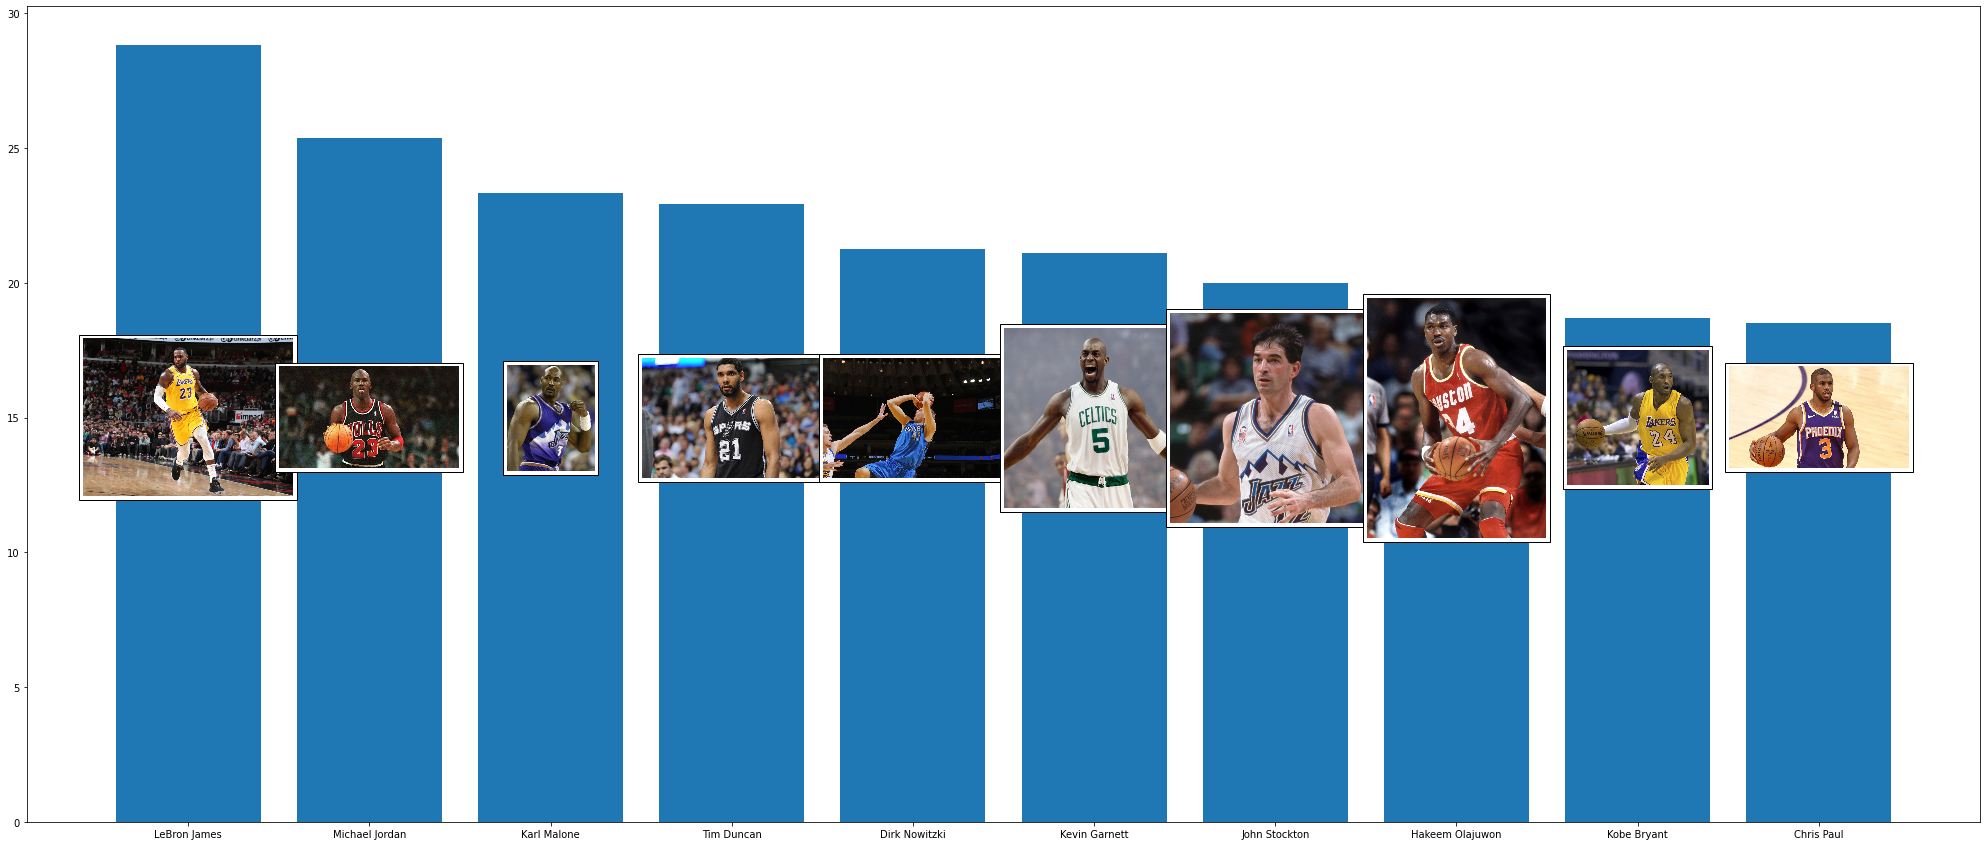

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

In [83]:
combined['overall_rating']= (.5*(combined['overall_def_rating']-combined['overall_def_rating'].mean())/combined['overall_def_rating'].std()+
                                 3*(combined['overall_off_rating']-combined['overall_off_rating'].mean())/combined['overall_off_rating'].std()
                             +.15*combined['WS']
                            )


fig, ax = plt.subplots(figsize=(35,15))

combined.sort_values(by=['overall_rating'], inplace=True, ascending=False)

plt.bar(combined[0:10].index, combined[0:10]['overall_rating'])


for name in combined[0:10].index:
    image = plt.imread('{}.jpeg'.format(name))
    imBox=OffsetImage(image, zoom=.15)
    ab=AnnotationBbox(imBox,[name,15])
    ax.add_artist(ab)
    plt.figure(figsize=(1, 10))
    
